<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [71]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [72]:
from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 10 different classes. 32x32 images.

In [73]:
print("There are ", len(X_train), "images in the training dataset and shape: ", X_train.shape)     
print("There are ", len(X_test), "images in the test dataset and shape: ", X_test.shape)

There are  50000 images in the training dataset and shape:  (50000, 32, 32, 3)
There are  10000 images in the test dataset and shape:  (10000, 32, 32, 3)


In [74]:
# Checking the shape of one image
X_train[5].shape # the number of channels are 3

(32, 32, 3)

In [75]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

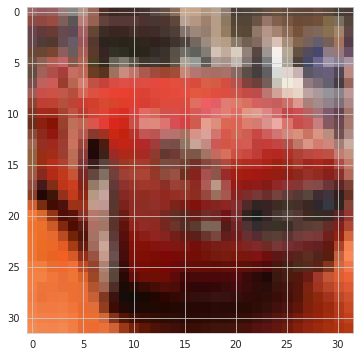

In [76]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [77]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [78]:
y_train.shape

(50000, 1)

In [79]:
y_train[5]   

array([1], dtype=uint8)

In [80]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [81]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [82]:
y_train[5]  # 1 --> automobile

array([1], dtype=uint8)

In [83]:
classes[y_train[5][0]]  # I. way

'automobile'

In [84]:
classes[int(y_train[5])] # II. way

'automobile'

In [85]:
#int(np.random.randint(low=0, high=50000, size=1))

In [86]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

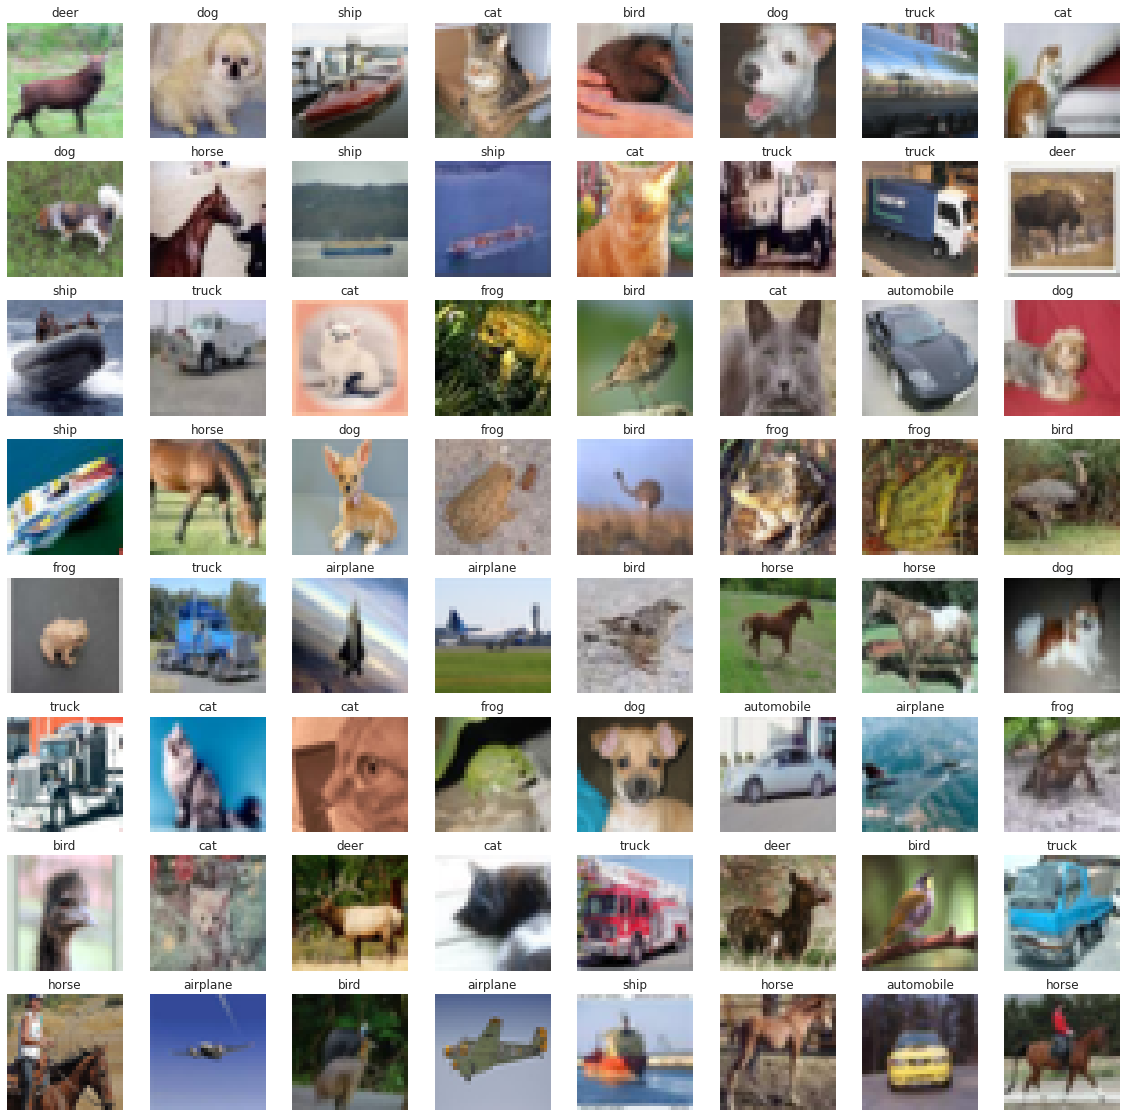

In [87]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# 64 images randomly from train dataset

# Data Preprocessing

In [88]:
# check scaling
X_train[5].min() 

0

In [89]:
X_train[5].max()

252

In [90]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [91]:
X_train[5].min()

0.0

In [92]:
X_train[5].max()

0.9882353

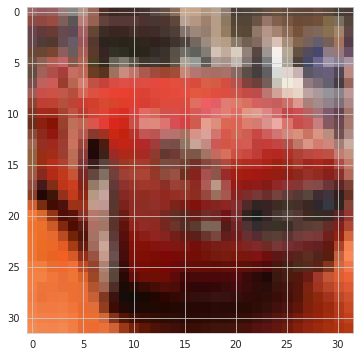

In [93]:
plt.imshow(X_train[5])

In [94]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

In [97]:
Y_train[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modelling-1

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [99]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # because of multiclass problems

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [103]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4666 - accuracy: 0.4743 - val_loss: 1.1692 - val_accuracy: 0.5786
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0838 - accuracy: 0.6166 - val_loss: 1.0249 - val_accuracy: 0.6364
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9357 - accuracy: 0.6711 - val_loss: 0.9601 - val_accuracy: 0.6635
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8409 - accuracy: 0.7040 - val_loss: 0.9030 - val_accuracy: 0.6875
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7633 - accuracy: 0.7323 - val_loss: 0.8820 - val_accuracy: 0.7036
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6986 - accuracy: 0.7549 - val_loss: 0.8750 - val_accuracy: 0.6985
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6436 - accuracy: 0.7735 - val_loss: 0.8622 - val_accuracy:

In [104]:
model.metrics_names

['loss', 'accuracy']

In [105]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.467,0.474,1.169,0.579
1,1.084,0.617,1.025,0.636
2,0.936,0.671,0.960,0.664
3,0.841,0.704,0.903,0.688
4,0.763,0.732,0.882,0.704


In [106]:
summary.tail()

,loss,accuracy,val_loss,val_accuracy
4,0.763,0.732,0.882,0.704
5,0.699,0.755,0.875,0.698
6,0.644,0.774,0.862,0.711
7,0.584,0.794,0.904,0.700
8,0.538,0.810,0.932,0.700


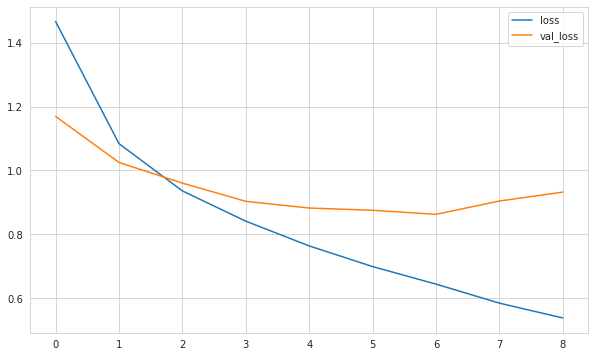

In [107]:
summary[["loss", "val_loss"]].plot();

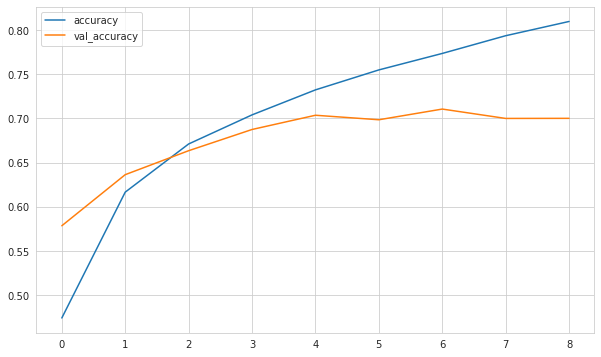

In [108]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [109]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8622 - accuracy: 0.7106


[0.8622244000434875, 0.7106000185012817]

In [110]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])    
print('Test accuracy:', score[1]) 

Test loss: 0.8622244000434875
Test accuracy: 0.7106000185012817


In [114]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[3.52639053e-03, 1.43081517e-04, 2.73967884e-03, ...,
        4.92262072e-04, 1.28140638e-03, 1.52858382e-04],
       [8.44171923e-03, 4.34483439e-01, 1.13479555e-05, ...,
        1.98732414e-06, 5.53771198e-01, 3.21255671e-03],
       [5.49717546e-01, 6.82994276e-02, 9.37836431e-03, ...,
        5.12429455e-04, 3.19468200e-01, 4.80500907e-02],
       ...,
       [7.23683843e-05, 1.88016638e-05, 5.78057719e-03, ...,
        2.49507297e-02, 7.73474749e-04, 1.01307647e-04],
       [2.02429816e-01, 1.94371119e-02, 3.53178941e-02, ...,
        3.96210293e-04, 5.00448048e-03, 1.85682933e-04],
       [7.17095077e-07, 1.98656221e-06, 1.00756715e-05, ...,
        9.98479664e-01, 3.72446834e-07, 9.58508721e-08]], dtype=float32)

In [115]:
y_pred = np.argmax(pred_prob, axis=1)

In [117]:
y_pred 

array([3, 8, 0, ..., 5, 4, 7])

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.83      0.80      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.65      0.35      0.45      1000
           4       0.61      0.70      0.66      1000
           5       0.57      0.72      0.64      1000
           6       0.75      0.79      0.77      1000
           7       0.76      0.79      0.78      1000
           8       0.77      0.86      0.81      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [121]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [122]:
print(confusion_matrix(y_test, y_pred)) 

[[769  12  52  10  18   7  14  15  70  33]
 [ 25 797  10   6   5   8  11   5  42  91]
 [ 56   4 562  29 127  85  65  40  17  15]
 [ 22  12  70 347 110 277  80  37  28  17]
 [ 20   5  64  23 705  50  41  73  17   2]
 [  9   3  42  73  53 719  29  46  15  11]
 [  8   6  49  20  72  37 794   5   7   2]
 [ 17   2  37  16  52  54  11 791   6  14]
 [ 57  23  12   2   4  10   2   6 856  28]
 [ 43  93   4   9   6   9   5  18  47 766]]


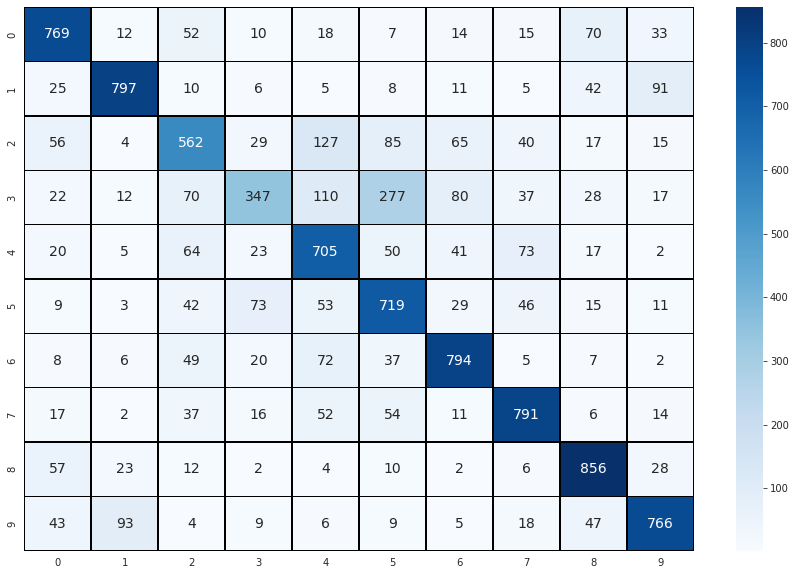

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-2

In [124]:
# Let's build a slightly more complex model
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [126]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4171 - accuracy: 0.4868 - val_loss: 1.0300 - val_accuracy: 0.6339
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0013 - accuracy: 0.6454 - val_loss: 0.8699 - val_accuracy: 0.7018
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8732 - accuracy: 0.6939 - val_loss: 0.8085 - val_accuracy: 0.7235
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7925 - accuracy: 0.7215 - val_loss: 0.7763 - val_accuracy: 0.7311
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7275 - accuracy: 0.7460 - val_loss: 0.7673 - val_accuracy: 0.7341
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6850 - accuracy: 0.7591 - val_loss: 0.7234 - val_accuracy: 0.7463
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6469 - accuracy: 0.7709 - val_loss: 0.7247 - val_accu

In [127]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.417,0.487,1.030,0.634
1,1.001,0.645,0.870,0.702
2,0.873,0.694,0.809,0.724
3,0.792,0.722,0.776,0.731
4,0.727,0.746,0.767,0.734


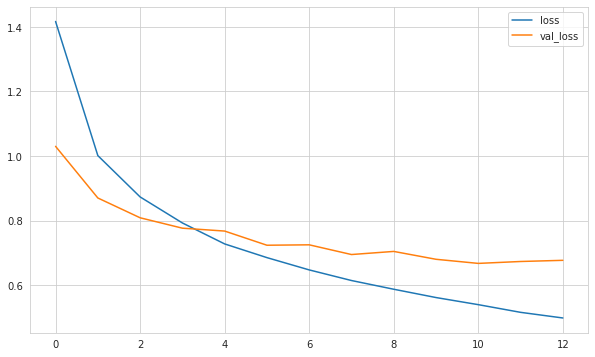

In [128]:
summary[["loss", "val_loss"]].plot();

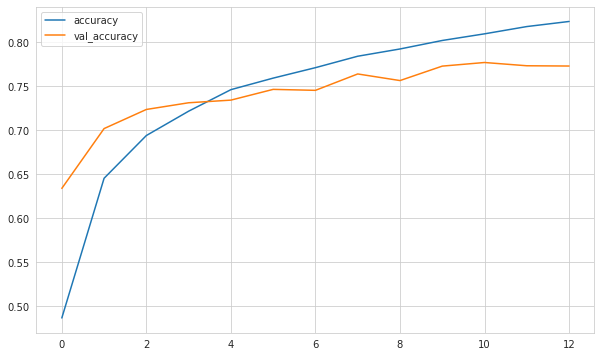

In [129]:
summary[["accuracy", "val_accuracy"]].plot();
# Model-2 has less overfitting compared to model-1. So we can say that this model works better

# Evaluation on Test Data

In [130]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6671 - accuracy: 0.7768


[0.667102038860321, 0.7767999768257141]

In [131]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.667102038860321
Test accuracy: 0.7767999768257141


In [132]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [133]:
y_pred = np.argmax(pred_prob, axis=1)

In [134]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      1000
           1       0.90      0.88      0.89      1000
           2       0.65      0.70      0.68      1000
           3       0.66      0.53      0.59      1000
           4       0.76      0.70      0.73      1000
           5       0.69      0.72      0.71      1000
           6       0.83      0.84      0.83      1000
           7       0.78      0.85      0.81      1000
           8       0.87      0.88      0.87      1000
           9       0.89      0.81      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



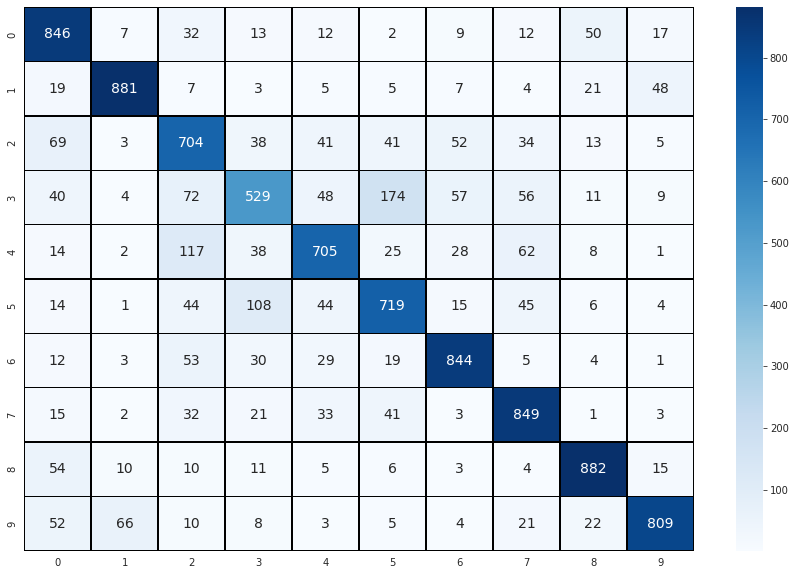

In [136]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-3

In [137]:
from tensorflow.keras.layers import BatchNormalization
# In cnn, batch normalization is more preferred than dropout.

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [140]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [142]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.2560 - accuracy: 0.5544 - val_loss: 1.2636 - val_accuracy: 0.5772
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8022 - accuracy: 0.7226 - val_loss: 0.8151 - val_accuracy: 0.7152
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6361 - accuracy: 0.7810 - val_loss: 0.7531 - val_accuracy: 0.7466
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5131 - accuracy: 0.8235 - val_loss: 0.6228 - val_accuracy: 0.7901
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4132 - accuracy: 0.8577 - val_loss: 0.6959 - val_accuracy: 0.7673
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3296 - accuracy: 0.8871 - val_loss: 0.6372 - val_accuracy: 0.7946


In [143]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.256,0.554,1.264,0.577
1,0.802,0.723,0.815,0.715
2,0.636,0.781,0.753,0.747
3,0.513,0.824,0.623,0.790
4,0.413,0.858,0.696,0.767


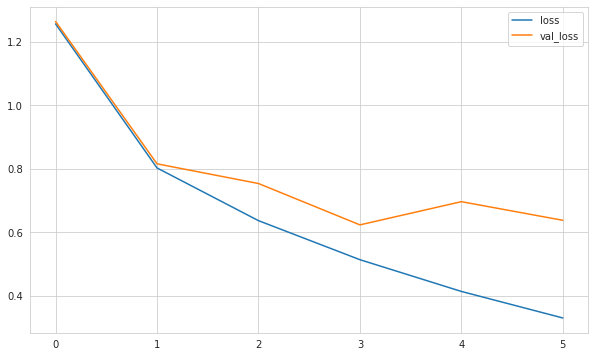

In [144]:
summary[["loss", "val_loss"]].plot();

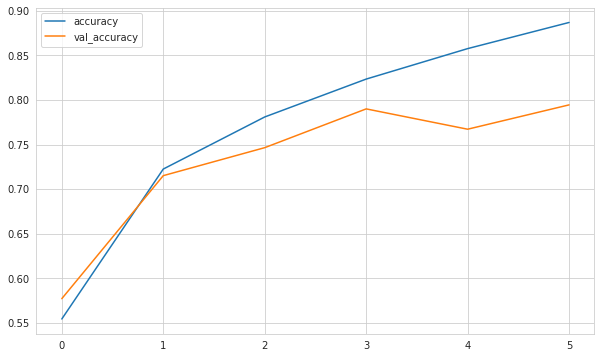

In [145]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [146]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6228 - accuracy: 0.7901


[0.6228058338165283, 0.7900999784469604]

In [147]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6228058338165283
Test accuracy: 0.7900999784469604


In [148]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [149]:
y_pred = np.argmax(pred_prob, axis=1)

In [150]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.87      0.93      0.90      1000
           2       0.79      0.62      0.70      1000
           3       0.63      0.65      0.64      1000
           4       0.71      0.80      0.75      1000
           5       0.70      0.69      0.70      1000
           6       0.89      0.76      0.82      1000
           7       0.80      0.86      0.83      1000
           8       0.85      0.90      0.87      1000
           9       0.87      0.85      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



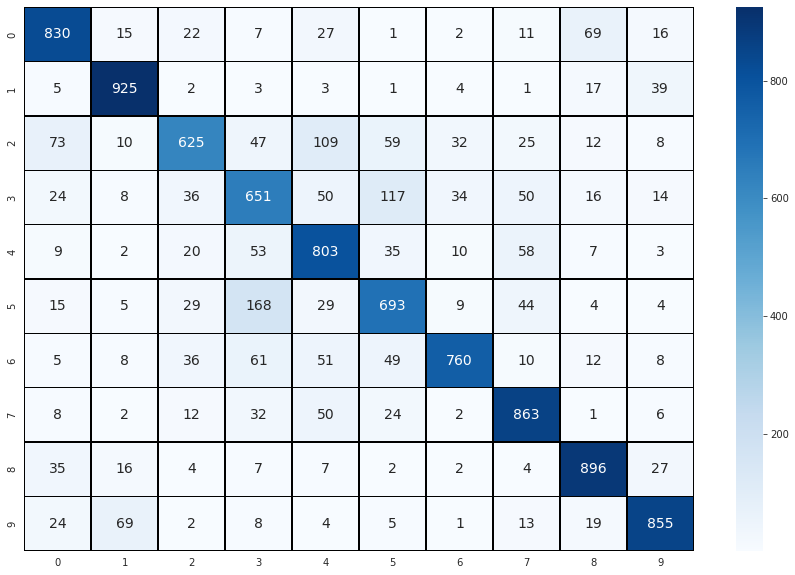

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [153]:
my_image = X_test[44]

In [154]:
my_image.shape

(32, 32, 3)

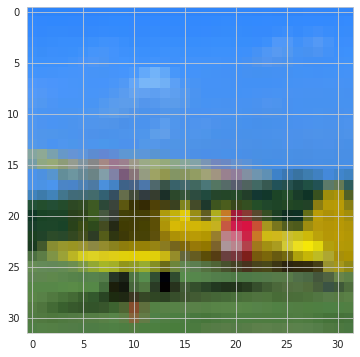

In [155]:
plt.imshow(my_image)

In [156]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 165ms/step


In [157]:
image_prediction

array([[9.2132682e-01, 9.6269732e-04, 2.1311212e-02, 8.1074203e-04,
        2.6722042e-02, 2.9370483e-04, 3.5517940e-03, 2.1076121e-03,
        7.9769436e-03, 1.4936337e-02]], dtype=float32)

In [158]:
np.argmax(image_prediction, axis=1)

array([0])

In [159]:
result=np.argmax(image_prediction, axis=1)

In [160]:
result

array([0])

In [161]:
classes[int(result)]

'airplane'

In [164]:
model.save("cnn_cifar.h5")

#### Finished

In [166]:
model=tf.keras.models.load_model('cnn_cifar.h5')

In [167]:
X_test[15].shape

(32, 32, 3)

In [168]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [169]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 214ms/step


In [170]:
np.argmax(pred)

8

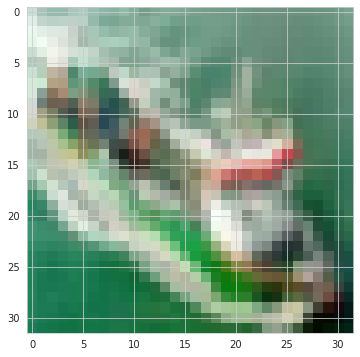

In [171]:
plt.imshow(X_test[15])

In [172]:
classes[8]

'ship'